In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from tifffile import imread
import numpy as np
import pickle
import os
import pandas as pd

root_dir = 'db'

In [2]:
ct_idx = 0
vol_dim = 9
with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)

#### Porosity check

In [3]:
for i in range(1):
    phys_generate = sim_results[i]['generate']

    print(30*"--")
    print('original',sim_results[i]['original']['porosity'])
    

    for phys_emsemble in phys_generate:
        if not phys_emsemble:
            continue
        print(phys_emsemble['porosity'])

------------------------------------------------------------
original 0.15280298408330387
0.15678326223449288
0.15687053455410344
0.1596850171501254


#### Check Vol_dim = 9

$64*9$ -> $576^3$

In [4]:
k_gen, k_real, k_compare,k_compare_real = [], [], [], []

k_gen_val, k_real_val = [], []


for ct_idx in range(6):
    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        # Deserialize the data from the file and assign it to a variable
        sim_results = pickle.load(file)
        print('-'*20)
        print(sim_results[0]['original']['porosity'])
        print(sim_results[0]['generate'][0]['porosity'])
    
    sample_idx = 0

    phys_generate = sim_results[sample_idx]['generate']
    phys_real = sim_results[sample_idx]['original']

    for phys_emsemble in phys_generate:
        if not phys_emsemble:
            continue
    if ct_idx < 2:
        k_gen_val.append(phys_emsemble['kabs'][0])
        k_real_val.append(phys_real['kabs'][0])
    else:
        k_gen.append(phys_emsemble['kabs'][0])
        k_real.append(phys_real['kabs'][0])


    compare_results = sim_results['compare']

    for compare_phys in compare_results:
        if not compare_phys:
            continue
        k_compare.append(compare_phys['kabs'][0])
        k_compare_real.append(phys_real['kabs'][0])
    

--------------------
0.15280298408330387
0.15678326223449288
--------------------
0.1954463702333971
0.20882028545698839
--------------------
0.16083817030667277
0.17454704630031506
--------------------
0.19939707270702053
0.2126260922278887
--------------------
0.14196307963304558
0.14033645922918542
--------------------
0.09045181483725298
0.08612221193248189


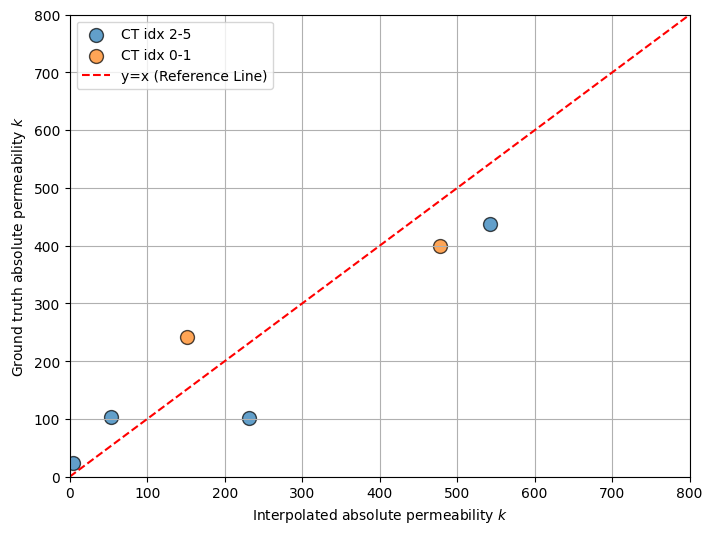

76.07631034912595
84.28643028126619


In [5]:
k_max = 800
plt.figure(figsize=(8, 6))  # Increase figure size

# Increase marker size and add edge color for better visibility
plt.scatter(k_gen, k_real, label='CT idx 2-5', s=100, edgecolor='black', alpha=0.7)
plt.scatter(k_gen_val, k_real_val, label='CT idx 0-1', s=100, edgecolor='black', alpha=0.7)

# plt.scatter(k_compare, k_compare_real, label='reference', s=100, edgecolor='black', alpha=0.7)
plt.plot([0, k_max], [0, k_max], linestyle='--', color='red', label='y=x (Reference Line)')

plt.xlim([0, k_max])
plt.ylim([0, k_max])

plt.xlabel('Interpolated absolute permeability $k$')
plt.ylabel('Ground truth absolute permeability $k$')
plt.legend()
plt.grid(True)  # Optional: add grid lines for better readability
plt.show()

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))

print(calculate_mae(k_gen, k_real))
print(calculate_mae(k_gen_val, k_real_val))

In [6]:
def plot_figure_air(kr_results_real, kr_results_pred, sim_results):
    f = plt.figure()
    # Using 'yo-' for yellow dots with a line, making the line thicker for visibility
    plt.plot(kr_results_real['snw'], kr_results_real['kr_air'], 'yo-', linewidth=4)

    for ensemble in kr_results_pred:
        if not ensemble:
            continue
        # Using 'r*-' for red stars with a line, specifying a smaller line width
        plt.plot(ensemble['snw'], ensemble['kr_air'], 'r*:', linewidth=3)
    # Plot comparison
    compare_phys = sim_results['compare']
    for compare in compare_phys:
        if not compare:
            continue
        
        plt.plot(compare['snw'], compare['kr_air'], 'g--', color='gray', markersize=5)
    # Adding a manual legend
    plt.legend(handles=[
        plt.Line2D([0], [0], color='yellow', marker='o', linestyle='-', linewidth=4, label='Real $k_{rnw}$ Data'),
        plt.Line2D([0], [0], color='red', marker='*', linestyle=':', linewidth=3, label='Predicted $k_{rnw}$ Data'),
        plt.Line2D([0], [0], color='gray', linestyle='--', markersize=5, label='Unconstrained $k_{rnw}$ Data')
    ], loc='best')
    plt.xlabel('Gas Saturation $S_{nw}$')
    plt.ylabel('Relative Permeability $k_{rnw}$')
    plt.title('Relative Permeability of Air')
    plt.show()



def plot_figure_water(kr_results_real, kr_results_pred, sim_results):
    f = plt.figure()
    # Using 'yo-' for yellow dots with a line, making the line thicker for visibility
    plt.plot(kr_results_real['snw'], kr_results_real['kr_water'], 'yo-', linewidth=4)

    for ensemble in kr_results_pred:
        if not ensemble:
            continue
        # Using 'r*-' for red stars with a line, specifying a smaller line width
        plt.plot(ensemble['snw'], ensemble['kr_water'], 'r*:', linewidth=3)

    # Plot comparison
    compare_phys = sim_results['compare']
    for compare in compare_phys:
        if not compare:
            continue
        # Using 'g.' for gray dots, no connecting line, and specifying marker size for smaller appearance
        plt.plot(compare['snw'], compare['kr_water'], 'g--', color='gray', markersize=5)
    
    plt.legend(
        handles=[
    plt.Line2D([0], [0], color='yellow', marker='o', linestyle='-', linewidth=4, label='Real $k_{rw}$ Data'),
    plt.Line2D([0], [0], color='red', marker='*', linestyle=':', linewidth=3, label='Predicted $k_{rw}$ Data'),
    plt.Line2D([0], [0], color='gray', linestyle='--', markersize=5, label='Unconstrained $k_{rw}$ Data')
    ], loc='best')

    plt.xlabel('Gas Saturation $S_{nw}$')
    plt.ylabel('Relative Permeability $k_{rw}$')

    plt.title('Relative Permeability of Water')
    plt.show()



# def plot_all_together(kr_results_real, kr_results_pred, sim_results):
#     f = plt.figure()
#     # Using 'yo-' for yellow dots with a line, making the line thicker for visibility
#     plt.plot(kr_results_real['snw'], kr_results_real['kr_air'], 'ro-', linewidth=6)
#     plt.plot(kr_results_real['snw'], kr_results_real['kr_water'], 'ro-', linewidth=6)

#     for i in range(len(kr_results_pred)):
#         ensemble = kr_results_pred[i]
#         if not ensemble:
#             continue
#         if i>2:
#             break
#         # Using 'r*-' for red stars with a line, specifying a smaller line width
#         plt.plot(ensemble['snw'], ensemble['kr_air'], 'b*:', linewidth=3)
#         plt.plot(ensemble['snw'], ensemble['kr_water'], 'b*:', linewidth=3)

#     # Plot comparison
#     compare_phys = sim_results['compare']
#     for compare in compare_phys:
#         if not compare:
#             continue
#         # Using 'g.' for gray dots, no connecting line, and specifying marker size for smaller appearance
#         plt.plot(compare['snw'], compare['kr_air'], 'g--', color='gray', markersize=5,linewidth=3)
#         plt.plot(compare['snw'], compare['kr_water'], 'g--', color='gray', markersize=5,linewidth=3)

#     plt.title('Relative Permeability of Air and Water')
#     plt.show()

#### Relative perm checkout

/tmp/ipykernel_380819/1122736437.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(compare['snw'], compare['kr_air'], 'g--', color='gray', markersize=5)


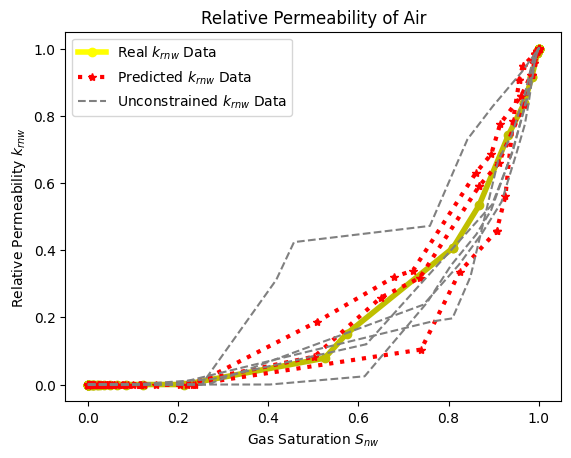

/tmp/ipykernel_380819/1122736437.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(compare['snw'], compare['kr_water'], 'g--', color='gray', markersize=5)


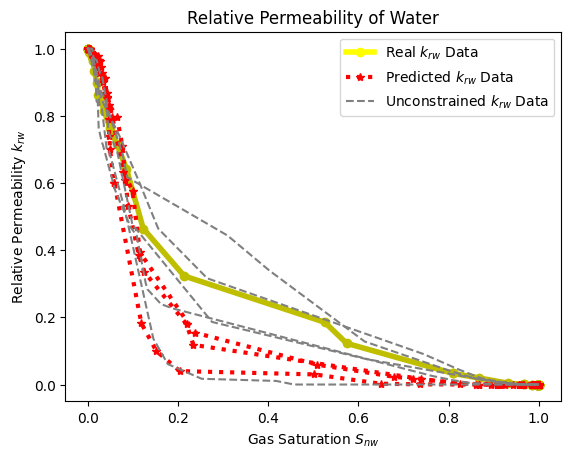

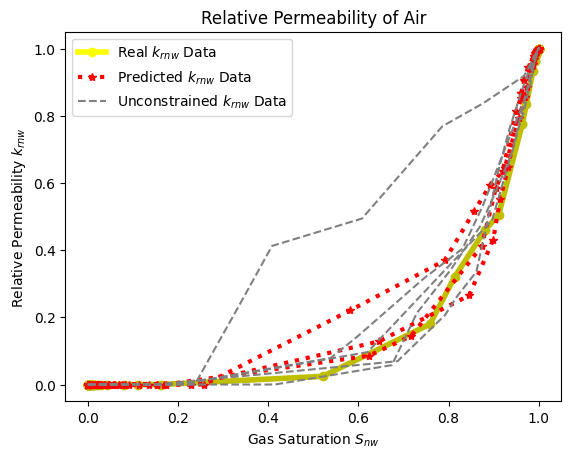

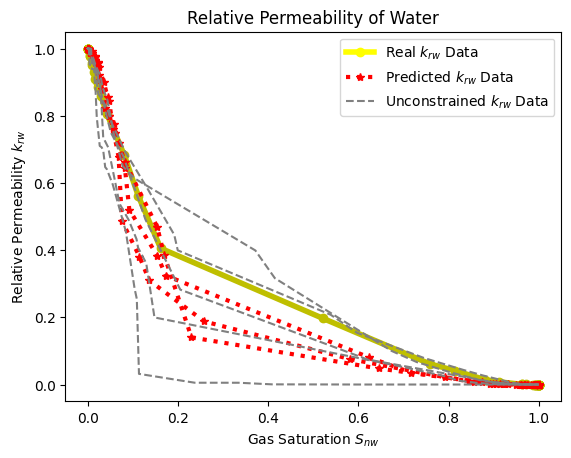

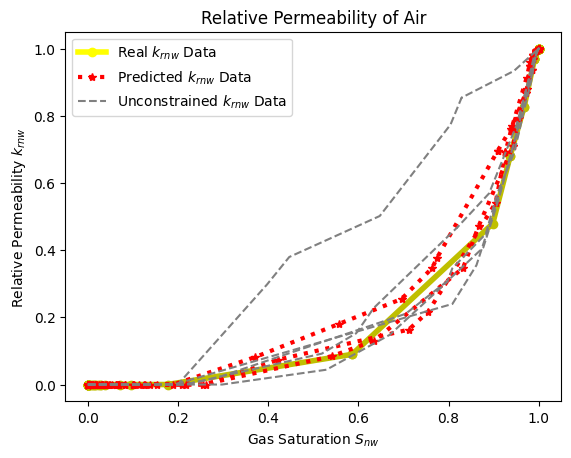

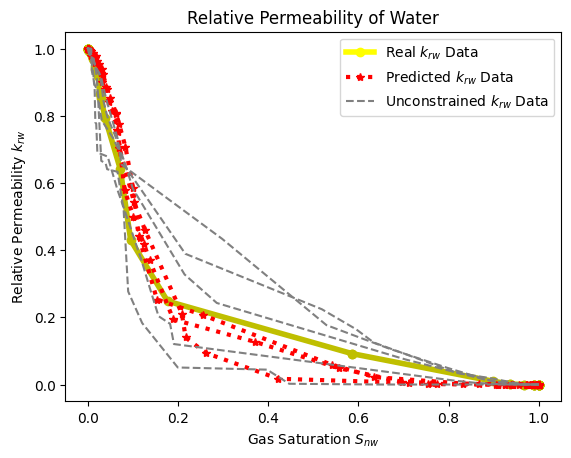

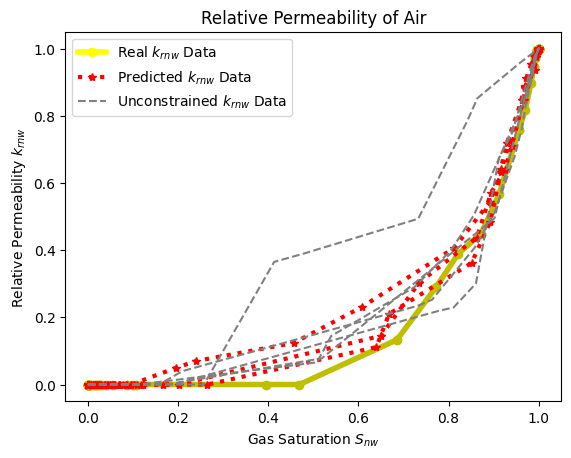

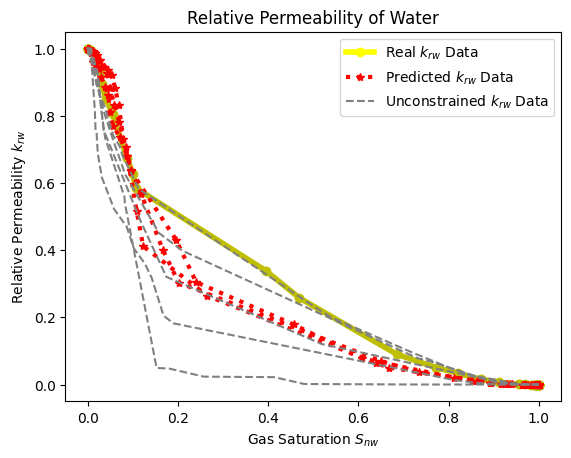

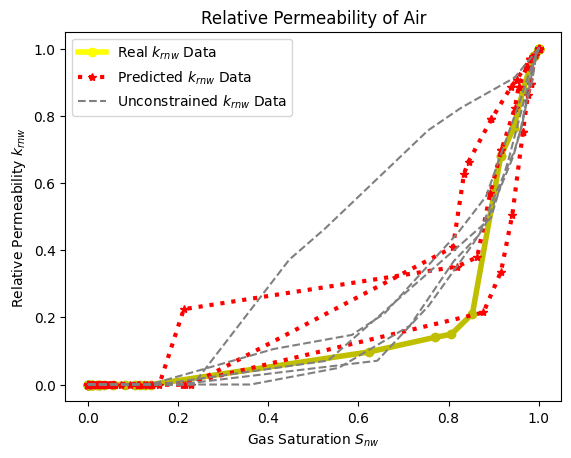

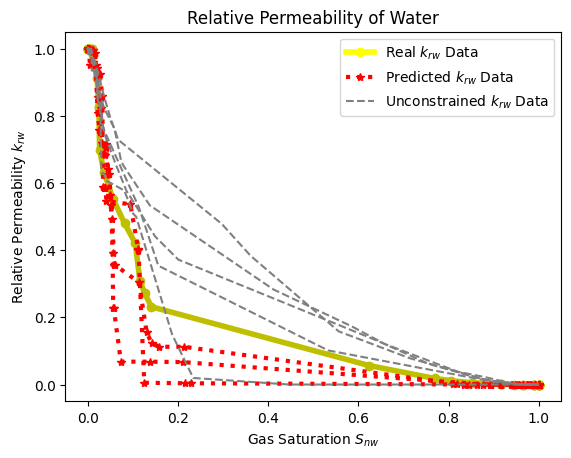

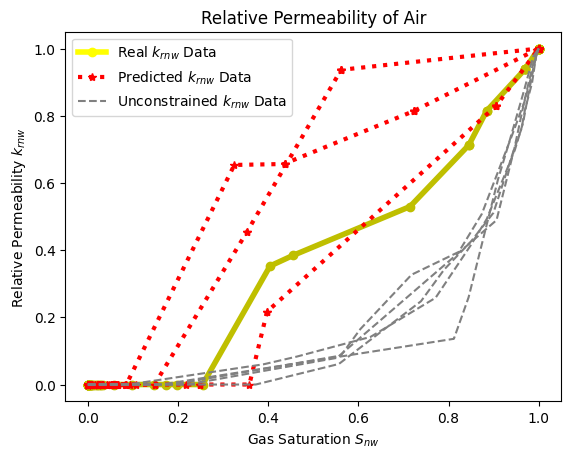

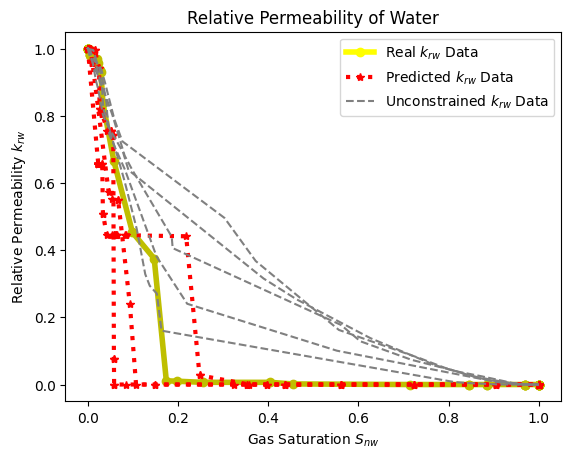

In [7]:

for ct_idx in range(6):
    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        # Deserialize the data from the file and assign it to a variable
        sim_results = pickle.load(file)



    # plot original kr
    sample_idx = 0
    kr_results_real = sim_results[sample_idx]['original']
    kr_results_pred = sim_results[sample_idx]['generate'][:]

    plot_figure_air(kr_results_real, kr_results_pred, sim_results)
    plot_figure_water(kr_results_real, kr_results_pred, sim_results)
    # plot_all_together(kr_results_real, kr_results_pred, sim_results)

#### Check Vol_dim = 6

$64*6$ -> $384^3$

$k_{abs}$ simulation

In [8]:
k_real_list = []
k_gen_list = []


k_real_list_val = []
k_gen_list_val = []

vol_dim = 6

for ct_idx in range(6):
    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        # Deserialize the data from the file and assign it to a variable
        sim_results = pickle.load(file)
    for sample_idx in range(6):
        phys_real = sim_results[sample_idx]['original']
        if not phys_real:
            continue
        k_real = phys_real['kabs'][0]
        for phys_emsemble in sim_results[sample_idx]['generate']:
            if not phys_emsemble:
                continue
            k_pred = phys_emsemble['kabs'][0]
        
        if ct_idx < 3:
            k_gen_list_val.append(k_pred)
            k_real_list_val.append(k_real)
        else:
            k_gen_list.append(k_pred)
            k_real_list.append(k_real)

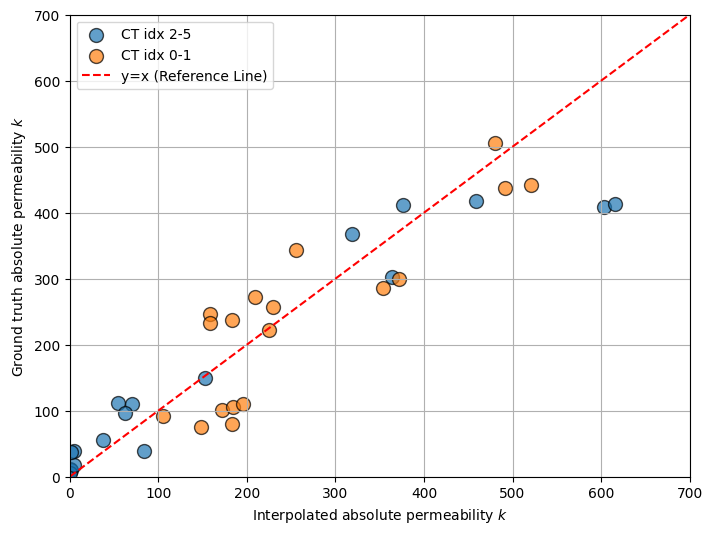

49.52054589479572
62.33233246660037


In [9]:
k_max = 700
plt.figure(figsize=(8, 6))  # Increase figure size

# Increase marker size and add edge color for better visibility
plt.scatter(k_gen_list, k_real_list, s=100, edgecolor='black', alpha=0.7,label='CT idx 2-5')
plt.scatter(k_gen_list_val, k_real_list_val, s=100, edgecolor='black', alpha=0.7,label='CT idx 0-1')

plt.plot([0, k_max], [0, k_max], linestyle='--', color='red', label='y=x (Reference Line)')

plt.xlim([0, k_max])
plt.ylim([0, k_max])
plt.xlabel('Interpolated absolute permeability $k$')
plt.ylabel('Ground truth absolute permeability $k$')
plt.legend()
plt.grid(True)  # Optional: add grid lines for better readability
plt.show()


def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))

print(calculate_mae(k_real_list, k_gen_list))
print(calculate_mae(k_real_list_val, k_gen_list_val))




#### Only include validation set

In [10]:
k_real_list = []
k_gen_list = []
vol_dim = 6

for ct_idx in [0,1]:
    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        # Deserialize the data from the file and assign it to a variable
        sim_results = pickle.load(file)
    for sample_idx in range(6):
        phys_real = sim_results[sample_idx]['original']
        if not phys_real:
            continue
        k_real = phys_real['kabs'][0]
        for phys_emsemble in sim_results[sample_idx]['generate']:
            if not phys_emsemble:
                continue
            k_pred = phys_emsemble['kabs'][0]
        k_gen_list.append(k_pred)
        k_real_list.append(k_real)

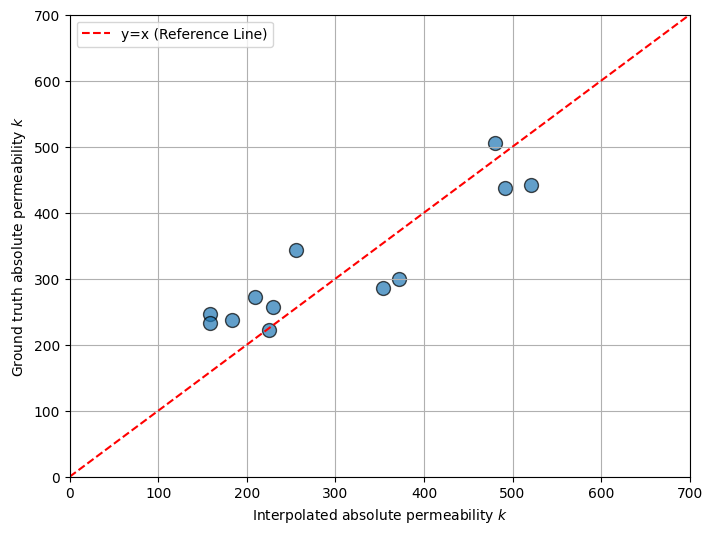

12


In [11]:
k_max = 700
plt.figure(figsize=(8, 6))  # Increase figure size

# Increase marker size and add edge color for better visibility
plt.scatter(k_gen_list, k_real_list, s=100, edgecolor='black', alpha=0.7)
plt.plot([0, k_max], [0, k_max], linestyle='--', color='red', label='y=x (Reference Line)')

plt.xlim([0, k_max])
plt.ylim([0, k_max])
plt.xlabel('Interpolated absolute permeability $k$')
plt.ylabel('Ground truth absolute permeability $k$')
plt.legend()
plt.grid(True)  # Optional: add grid lines for better readability
plt.show()


# calculate the mean absolute error between the generated and real values
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))

calculate_mae(k_real_list, k_gen_list)


print(len(k_real_list))


In [12]:
def plot_figure_air(kr_results_real, kr_results_pred, sim_results):
    f = plt.figure()
    # Using 'yo-' for yellow dots with a line, making the line thicker for visibility
    plt.plot(kr_results_real['snw'], kr_results_real['kr_air'], 'yo-', linewidth=4)

    for ensemble in kr_results_pred:
        if not ensemble:
            continue
        # Using 'r*-' for red stars with a line, specifying a smaller line width
        plt.plot(ensemble['snw'], ensemble['kr_air'], 'r*:', linewidth=3)
    # Plot comparison
    compare_phys = sim_results['compare']
    for compare in compare_phys:
        if not compare:
            continue
        
        plt.plot(compare['snw'], compare['kr_air'], 'g--', color='gray', markersize=5)
    # Adding a manual legend
    plt.legend(handles=[
        plt.Line2D([0], [0], color='yellow', marker='o', linestyle='-', linewidth=4, label='Real $k_{rnw}$ Data'),
        plt.Line2D([0], [0], color='red', marker='*', linestyle=':', linewidth=3, label='Predicted $k_{rnw}$ Data'),
        plt.Line2D([0], [0], color='gray', linestyle='--', markersize=5, label='Unconstrained $k_{rnw}$ Data')
    ], loc='best')
    plt.xlabel('Gas Saturation $S_{nw}$')
    plt.ylabel('Relative Permeability $k_{rnw}$')
    plt.title('Relative Permeability of Air')
    plt.show()



def plot_figure_water(kr_results_real, kr_results_pred, sim_results):
    f = plt.figure()
    # Using 'yo-' for yellow dots with a line, making the line thicker for visibility
    plt.plot(kr_results_real['snw'], kr_results_real['kr_water'], 'yo-', linewidth=4)

    for ensemble in kr_results_pred:
        if not ensemble:
            continue
        # Using 'r*-' for red stars with a line, specifying a smaller line width
        plt.plot(ensemble['snw'], ensemble['kr_water'], 'r*:', linewidth=3)

    # Plot comparison
    compare_phys = sim_results['compare']
    for compare in compare_phys:
        if not compare:
            continue
        # Using 'g.' for gray dots, no connecting line, and specifying marker size for smaller appearance
        plt.plot(compare['snw'], compare['kr_water'], 'g--', color='gray', markersize=5)
    
    plt.legend(
        handles=[
    plt.Line2D([0], [0], color='yellow', marker='o', linestyle='-', linewidth=4, label='Real $k_{rw}$ Data'),
    plt.Line2D([0], [0], color='red', marker='*', linestyle=':', linewidth=3, label='Predicted $k_{rw}$ Data'),
    plt.Line2D([0], [0], color='gray', linestyle='--', markersize=5, label='Unconstrained $k_{rw}$ Data')
    ], loc='best')

    plt.xlabel('Gas Saturation $S_{nw}$')
    plt.ylabel('Relative Permeability $k_{rw}$')

    plt.title('Relative Permeability of Water')
    plt.show()


/tmp/ipykernel_380819/4011391950.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(compare['snw'], compare['kr_air'], 'g--', color='gray', markersize=5)


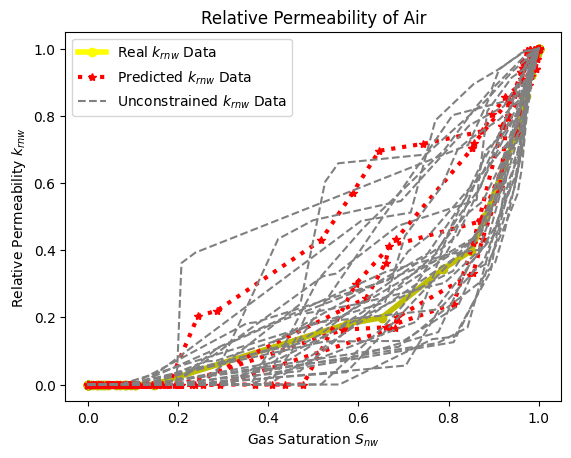

/tmp/ipykernel_380819/4011391950.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(compare['snw'], compare['kr_water'], 'g--', color='gray', markersize=5)


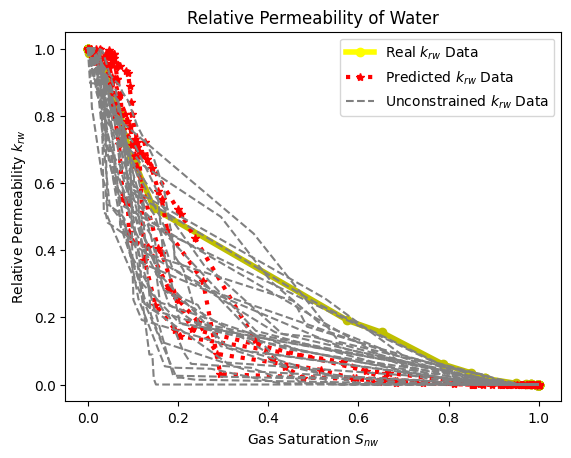

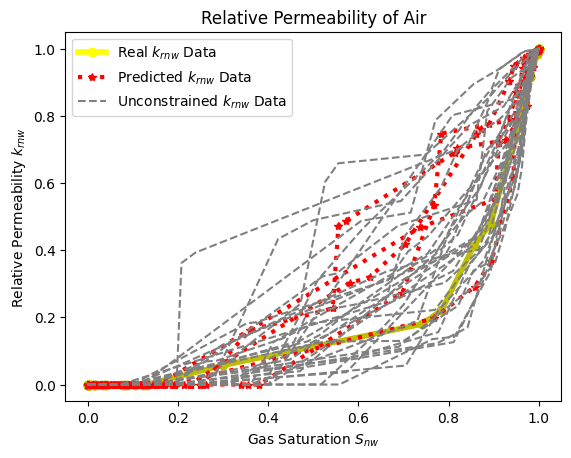

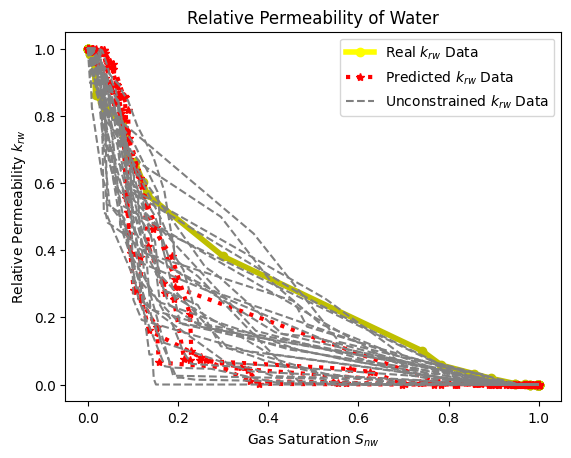

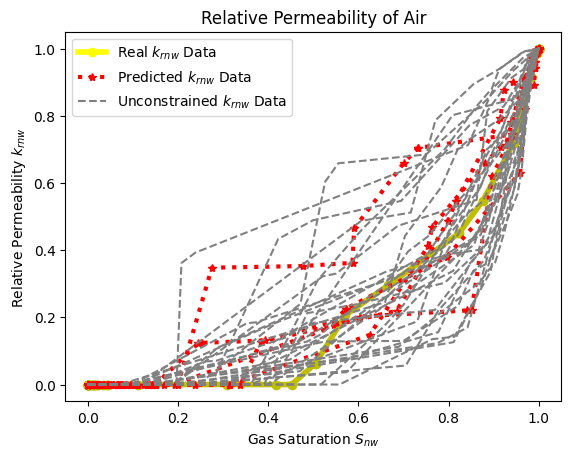

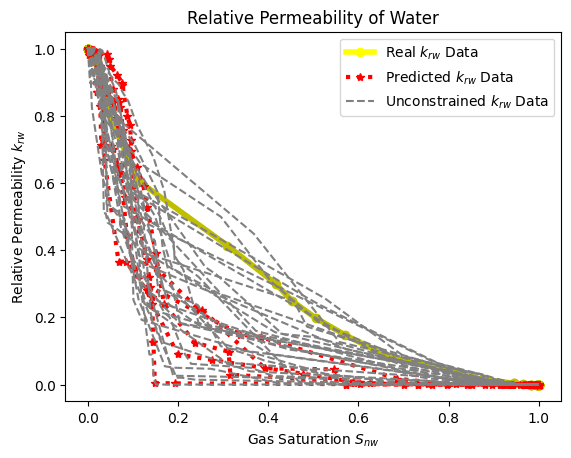

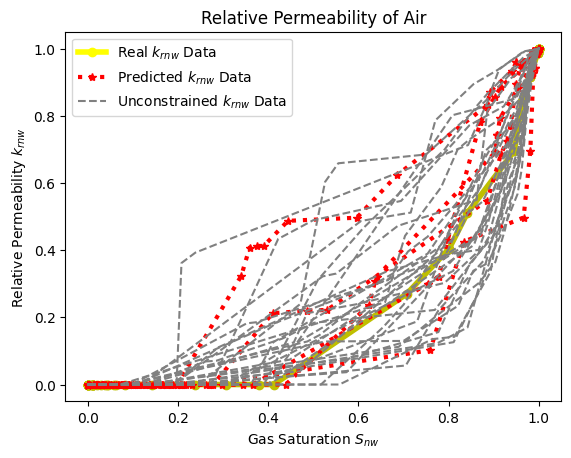

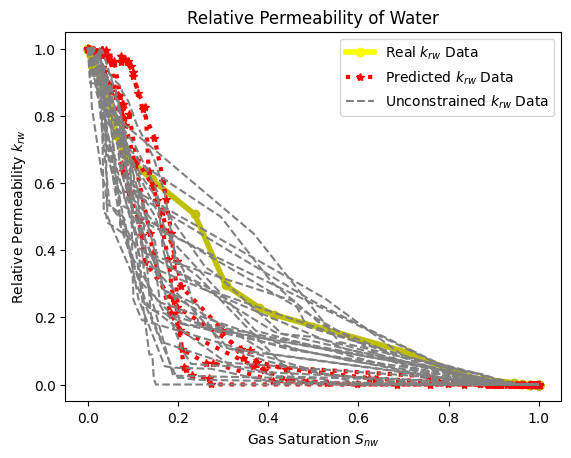

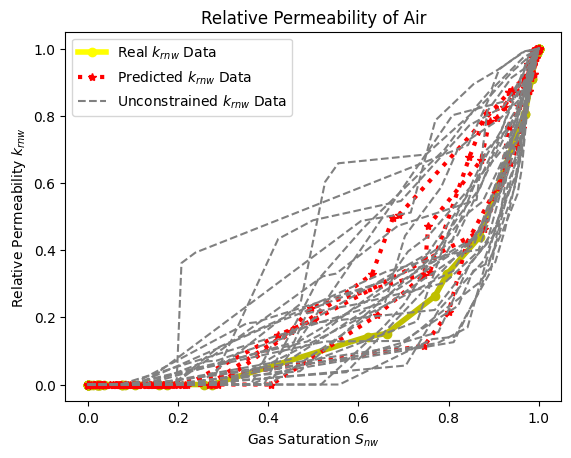

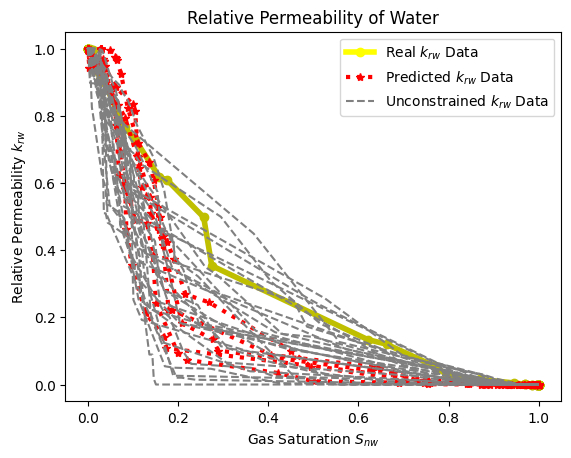

In [13]:
ct_idx = 0
vol_dim = 6

with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)

# plot original kr

for sample_idx in range(5):

    kr_results_real = sim_results[sample_idx]['original']
    kr_results_pred = sim_results[sample_idx]['generate'][:5]

    plot_figure_air(kr_results_real, kr_results_pred, sim_results)
    plot_figure_water(kr_results_real, kr_results_pred, sim_results)

In [ ]:
import matplotlib.pyplot as plt

def plot_subplot(ax, kr_results_real, kr_results_pred, sim_results, fluid_type):
    if fluid_type == 'air':
        y_key = 'kr_air'
        title = 'Relative Permeability of Air'
        ylabel = '$k_{rnw}$'
    else:
        y_key = 'kr_water'
        title = 'Relative Permeability of Water'
        ylabel = '$k_{rw}$'

    ax.plot(kr_results_real['snw'], kr_results_real[y_key], 'yo-', linewidth=4, label='Real Data')

    for i, ensemble in enumerate(kr_results_pred):
        if not ensemble:
            continue
        if i == 0:
            ax.plot(ensemble['snw'], ensemble[y_key], 'r*:', linewidth=3, label='Predicted Data')
        else:
            ax.plot(ensemble['snw'], ensemble[y_key], 'r*:', linewidth=3)

    compare_phys = sim_results['compare']
    for i, compare in enumerate(compare_phys):
        if not compare:
            continue
        if i == 0:
            ax.plot(compare['snw'], compare[y_key], 'g--', color='gray', markersize=5, label='Unconstrained Data')
        else:
            ax.plot(compare['snw'], compare[y_key], 'g--', color='gray', markersize=5)

    ax.set_xlabel('Gas Saturation $S_{nw}$', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend(fontsize=10, loc='best')
    ax.tick_params(axis='both', which='major', labelsize=10)

def plot_grid(sim_results,ct_idx):
    fig, axs = plt.subplots(4, 2, figsize=(15, 20))

    for sample_idx in range(4):
        kr_results_real = sim_results[sample_idx]['original']
        kr_results_pred = sim_results[sample_idx]['generate'][:5]

        plot_subplot(axs[sample_idx, 0], kr_results_real, kr_results_pred, sim_results, 'air')
        plot_subplot(axs[sample_idx, 1], kr_results_real, kr_results_pred, sim_results, 'water')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust this value to make room for the main title
    # plt.show()
    fig.savefig(f'kr_sim_ct_{ct_idx}_vol_6.png')


for ct_idx in range(6):

    vol_dim = 6

    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        # Deserialize the data from the file and assign it to a variable
        sim_results = pickle.load(file)

    # Usage
    plot_grid(sim_results,ct_idx)

In [ ]:
import matplotlib.pyplot as plt

def plot_subplot(ax, kr_results_real, kr_results_pred, sim_results, fluid_type):
    if fluid_type == 'air':
        y_key = 'kr_air'
        title = 'Relative Permeability of Air'
        ylabel = '$k_{rnw}$'
    else:
        y_key = 'kr_water'
        title = 'Relative Permeability of Water'
        ylabel = '$k_{rw}$'

    ax.plot(kr_results_real['snw'], kr_results_real[y_key], 'yo-', linewidth=4)

    for i, ensemble in enumerate(kr_results_pred):
        if not ensemble:
            continue
        ax.plot(ensemble['snw'], ensemble[y_key], 'r*:', linewidth=3)

    compare_phys = sim_results['compare']
    for i, compare in enumerate(compare_phys):
        if not compare:
            continue
        ax.plot(compare['snw'], compare[y_key], 'g--', color='gray', markersize=5)

    ax.set_xlabel('Gas Saturation $S_{nw}$', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=20)  # Increased y-label font size
    ax.set_title(title, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=10)

def plot_grid(sim_results, ct_idx):
    fig, axs = plt.subplots(4, 2, figsize=(15, 22))  # Increased figure height

    for sample_idx in range(4):
        kr_results_real = sim_results[sample_idx]['original']
        kr_results_pred = sim_results[sample_idx]['generate'][:5]

        plot_subplot(axs[sample_idx, 0], kr_results_real, kr_results_pred, sim_results, 'air')
        plot_subplot(axs[sample_idx, 1], kr_results_real, kr_results_pred, sim_results, 'water')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95, bottom=0.1)  # Adjusted to make room for the legend

    # Add a single legend for all subplots
    handles = [
        plt.Line2D([], [], color='yellow', marker='o', linestyle='-', linewidth=4, label='Real Data'),
        plt.Line2D([], [], color='red', marker='*', linestyle=':', linewidth=3, label='Predicted Data'),
        plt.Line2D([], [], color='gray', linestyle='--', linewidth=2, label='Unconstrained Data')
    ]
    fig.legend(handles=handles, loc='lower center', ncol=3, fontsize=18, bbox_to_anchor=(0.5, 0.02))

    fig.savefig(f'kr_sim_ct_{ct_idx}_vol_6.png')

for ct_idx in range(6):
    vol_dim = 6

    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        sim_results = pickle.load(file)

    plot_grid(sim_results, ct_idx)

In [27]:
import matplotlib.pyplot as plt

plt.ioff()
def plot_subplot(ax, kr_results_real, kr_results_pred, sim_results, fluid_type, show_xlabel=False, show_title=False):
    if fluid_type == 'air':
        y_key = 'kr_air'
        title = 'Relative Permeability of Air'
        ylabel = '$k_{rnw}$'
    else:
        y_key = 'kr_water'
        title = 'Relative Permeability of Water'
        ylabel = '$k_{rw}$'

    ax.plot(kr_results_real['snw'], kr_results_real[y_key], 'yo-', linewidth=4)

    for ensemble in kr_results_pred:
        if ensemble:
            ax.plot(ensemble['snw'], ensemble[y_key], 'r*:', linewidth=3)

    compare_phys = sim_results['compare']
    for compare in compare_phys:
        if compare:
            ax.plot(compare['snw'], compare[y_key], 'g--', color='gray', markersize=5)

    if show_xlabel:
        ax.set_xlabel('Gas Saturation $S_{nw}$', fontsize=20)
    else:
        ax.set_xlabel('')
    ax.set_ylabel(ylabel, fontsize=20)
    if show_title:
        ax.set_title(title, fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=12)

def plot_grid(sim_results, ct_idx):
    fig, axs = plt.subplots(4, 2, figsize=(15, 22))

    for sample_idx in range(4):
        kr_results_real = sim_results[sample_idx]['original']
        kr_results_pred = sim_results[sample_idx]['generate'][:5]

        show_xlabel = (sample_idx == 3)  # Only show x-label for bottom row
        show_title = (sample_idx == 0)   # Only show title for top row

        plot_subplot(axs[sample_idx, 0], kr_results_real, kr_results_pred, sim_results, 'air', show_xlabel, show_title)
        plot_subplot(axs[sample_idx, 1], kr_results_real, kr_results_pred, sim_results, 'water', show_xlabel, show_title)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95, bottom=0.1, hspace=0.3)  # Adjusted spacing

    # Add a single legend for all subplots
    handles = [
        plt.Line2D([], [], color='yellow', marker='o', linestyle='-', linewidth=4, label='Real Data'),
        plt.Line2D([], [], color='red', marker='*', linestyle=':', linewidth=3, label='Predicted Data'),
        plt.Line2D([], [], color='gray', linestyle='--', linewidth=2, label='Unconstrained Data')
    ]
    fig.legend(handles=handles, loc='lower center', ncol=3, fontsize=18, bbox_to_anchor=(0.5, 0.02))

    fig.savefig(f'kr_sim_ct_{ct_idx}_vol_6.png')

for ct_idx in range(6):
    vol_dim = 6

    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        sim_results = pickle.load(file)

    plot_grid(sim_results, ct_idx)

/tmp/ipykernel_380819/254517922.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  ax.plot(compare['snw'], compare[y_key], 'g--', color='gray', markersize=5)


#### Karman Cozeney Equation


Our approach's performance on predicting test samples' $k_{abs}$ is equilvalent to Karman Cozeney Approach to predict $k_{abs}$ on test samples. For training samples, Karman Cozeney equation gives better performance. Current observation: not necessary to use current approach to predict $k$ if you have enough reference data to build Karman Cozeney Model of predicting $k_{abs}$ at the same scale.

In [34]:
phi_real_train = []
k_real_train = []

phi_real_val = []
k_real_val = []

vol_dim = 9

for ct_idx in range(6):
    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        # Deserialize the data from the file and assign it to a variable
        sim_results = pickle.load(file)
    for sample_idx in range(1):
        phys_real = sim_results[sample_idx]['original']
        if not phys_real:
            continue
        k_real = phys_real['kabs'][0]
        phi_real = phys_real['porosity']
        if ct_idx < 3:
            # vallidation
            phi_real_val.append(phi_real)
            k_real_val.append(k_real)
        
        else:
            phi_real_train.append(phi_real)
            k_real_train.append(k_real)

Fitted parameters:
A = 438.3854279714506
n = 1.708971701054472
m = -12.377750677087242

Error Metrics:
Training MAE: 0.0000
Testing MAE: 57.7430
Training R^2: 1.0000
Testing R^2: 0.6511


/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


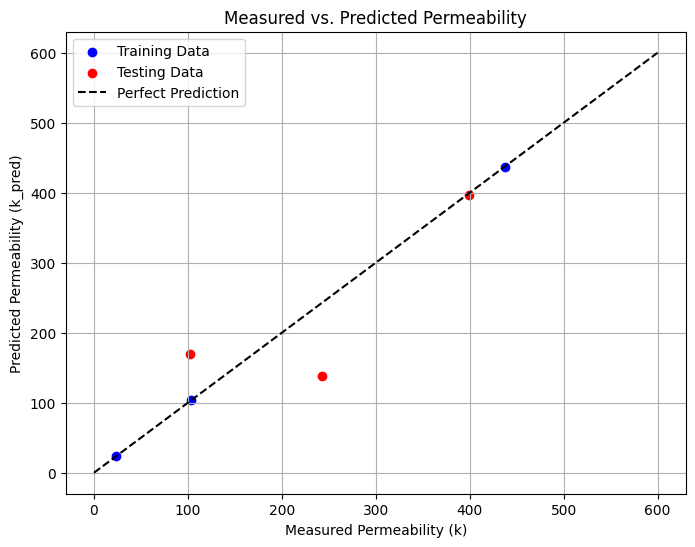

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


# mask = (phi > 0) & (phi < 1) & (k > 0)
# phi = phi[mask]
# k = k[mask]

phi_train, phi_test, k_train, k_test = np.array(phi_real_train), np.array(phi_real_val), np.array(k_real_train),np.array(k_real_val)
# Filter out non-physical values

# Split data into training and testing sets
# phi_train, phi_test, k_train, k_test = train_test_split(phi, k, test_size=0.2, random_state=42)

# Define the model function
def ln_k_model(phi, ln_A, n, m):
    return ln_A + n * np.log(phi) + m * np.log(1 - phi)

# Take natural logarithm of permeability
ln_k_train = np.log(k_train)

# Perform curve fitting
initial_guess = [0, 3, -2]
popt, pcov = curve_fit(ln_k_model, phi_train, ln_k_train, p0=initial_guess)
ln_A_fit, n_fit, m_fit = popt
A_fit = np.exp(ln_A_fit)

print("Fitted parameters:")
print(f"A = {A_fit}")
print(f"n = {n_fit}")
print(f"m = {m_fit}")

# Predict ln(k) for training and testing data
ln_k_train_pred = ln_k_model(phi_train, *popt)
ln_k_test_pred = ln_k_model(phi_test, *popt)

# Convert predictions back to k
k_train_pred = np.exp(ln_k_train_pred)
k_test_pred = np.exp(ln_k_test_pred)

# Calculate error metrics
mae_train = mean_absolute_error(k_train, k_train_pred)
mae_test = mean_absolute_error(k_test, k_test_pred)
r2_train = r2_score(k_train, k_train_pred)
r2_test = r2_score(k_test, k_test_pred)

print("\nError Metrics:")
print(f"Training MAE: {mae_train:.4f}")
print(f"Testing MAE: {mae_test:.4f}")
print(f"Training R^2: {r2_train:.4f}")
print(f"Testing R^2: {r2_test:.4f}")

# Define a function to predict permeability for new porosity values
def predict_permeability(phi_values):
    ln_k_pred = ln_k_model(phi_values, *popt)
    k_pred = np.exp(ln_k_pred)
    return k_pred


# Plot measured vs. predicted permeability
plt.figure(figsize=(8, 6))
plt.scatter(k_train, k_train_pred, color='blue', label='Training Data')
plt.scatter(k_test, k_test_pred, color='red', label='Testing Data')
plt.plot([0, 600], [0, 600], 'k--', label='Perfect Prediction')
plt.xlabel('Measured Permeability (k)')
plt.ylabel('Predicted Permeability (k_pred)')
plt.title('Measured vs. Predicted Permeability')
plt.legend()
plt.grid(True)
plt.show()


#### Upscaling comparison

what about using lower scale Karman-Cozeney model to infer upscaled $k_{abs}$, will it still achieve relative equivalent performance? KC model at $6^3$ to infer $k_{abs}$ at $9^3$.

In [4]:
# build KC model at lower scale
phi_real_train = []
k_real_train = []

phi_real_val = []
k_real_val = []

vol_dim = 6

for ct_idx in range(6):
    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        # Deserialize the data from the file and assign it to a variable
        sim_results = pickle.load(file)
    for sample_idx in range(6):
        phys_real = sim_results[sample_idx]['original']
        if not phys_real:
            continue
        k_real = phys_real['kabs'][0]
        phi_real = phys_real['porosity']
        if ct_idx < 3:
            # vallidation
            phi_real_val.append(phi_real)
            k_real_val.append(k_real)
        
        else:
            phi_real_train.append(phi_real)
            k_real_train.append(k_real)




import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


# mask = (phi > 0) & (phi < 1) & (k > 0)
# phi = phi[mask]
# k = k[mask]

phi_train, phi_test, k_train, k_test = np.array(phi_real_train), np.array(phi_real_val), np.array(k_real_train),np.array(k_real_val)
# Filter out non-physical values

# Split data into training and testing sets
# phi_train, phi_test, k_train, k_test = train_test_split(phi, k, test_size=0.2, random_state=42)

# Define the model function
def ln_k_model(phi, ln_A, n, m):
    return ln_A + n * np.log(phi) + m * np.log(1 - phi)

# Take natural logarithm of permeability
ln_k_train = np.log(k_train)

# Perform curve fitting
initial_guess = [0, 3, -2]
popt, pcov = curve_fit(ln_k_model, phi_train, ln_k_train, p0=initial_guess)
ln_A_fit, n_fit, m_fit = popt
A_fit = np.exp(ln_A_fit)

print("Fitted parameters:")
print(f"A = {A_fit}")
print(f"n = {n_fit}")
print(f"m = {m_fit}")

# Predict ln(k) for training and testing data
ln_k_train_pred = ln_k_model(phi_train, *popt)
ln_k_test_pred = ln_k_model(phi_test, *popt)

# Convert predictions back to k
k_train_pred = np.exp(ln_k_train_pred)
k_test_pred = np.exp(ln_k_test_pred)

# Calculate error metrics
mae_train = mean_absolute_error(k_train, k_train_pred)
mae_test = mean_absolute_error(k_test, k_test_pred)


print("\nError Metrics:")
print(f"Training MAE: {mae_train:.4f}")
print(f"Testing MAE: {mae_test:.4f}")

Fitted parameters:
A = 3652.463624337935
n = 2.4140143029786927
m = -7.294014046210354

Error Metrics:
Training MAE: 21.5558
Testing MAE: 60.1726


In [5]:
# validate KC model at larger scale

phi_real_train = []
k_real_train = []

vol_dim = 9

for ct_idx in range(6):
    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        # Deserialize the data from the file and assign it to a variable
        sim_results = pickle.load(file)
    for sample_idx in range(1):
        phys_real = sim_results[sample_idx]['original']
        if not phys_real:
            continue
        k_real = phys_real['kabs'][0]
        phi_real = phys_real['porosity']
        phi_real_train.append(phi_real)
        k_real_train.append(k_real)

# Take natural logarithm of permeability
phi_train, k_train = np.array(phi_real_train), np.array(k_real_train)
ln_k_train = np.log(k_train)
# Predict ln(k)
ln_k_train_pred = ln_k_model(phi_train, *popt)


# Convert predictions back to k
k_train_pred = np.exp(ln_k_train_pred)

# Calculate error metrics
mae_train = mean_absolute_error(k_train, k_train_pred)


print("\nError Metrics:")
print(f"Training MAE: {mae_train:.4f}")



Error Metrics:
Training MAE: 47.5320


In [13]:
import numpy as np
import pickle
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error

# Initialize variables for lower scale data
phi_train_low = []
k_train_low = []
phi_val_low = []
k_val_low = []

vol_dim_low = 6

# Load lower scale data
for ct_idx in range(6):
    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim_low}.pickle', 'rb') as file:
        sim_results = pickle.load(file)
    for sample_idx in range(6):
        phys_real = sim_results[sample_idx]['original']
        if not phys_real:
            continue
        k_real = phys_real['kabs'][0]
        phi_real = phys_real['porosity']
        if ct_idx < 3:
            # Validation data
            phi_val_low.append(phi_real)
            k_val_low.append(k_real)
        else:
            # Training data
            phi_train_low.append(phi_real)
            k_train_low.append(k_real)

# Convert to NumPy arrays
phi_train_low = np.array(phi_train_low)
k_train_low = np.array(k_train_low)
phi_val_low = np.array(phi_val_low)
k_val_low = np.array(k_val_low)

# Define the KC model function
def ln_k_model(phi, ln_A, n, m):
    return ln_A + n * np.log(phi) + m * np.log(1 - phi)

# Fit the model using lower scale training data
ln_k_train_low = np.log(k_train_low)
initial_guess = [0, 3, -2]
popt, pcov = curve_fit(ln_k_model, phi_train_low, ln_k_train_low, p0=initial_guess)
ln_A_fit, n_fit, m_fit = popt
A_fit = np.exp(ln_A_fit)

print("Fitted parameters at lower scale:")
print(f"A = {A_fit}")
print(f"n = {n_fit}")
print(f"m = {m_fit}")

# Predict on lower scale validation data
ln_k_val_low_pred = ln_k_model(phi_val_low, *popt)
k_val_low_pred = np.exp(ln_k_val_low_pred)

# Calculate error metrics for lower scale validation
mae_val_low = mean_absolute_error(k_val_low, k_val_low_pred)

print("\nError Metrics for Lower Scale Validation Data:")
print(f"Validation MAE: {mae_val_low:.4f}")

# Load higher scale test data
phi_test_high = []
k_test_high = []

vol_dim_high = 9

for ct_idx in range(6):
    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim_high}.pickle', 'rb') as file:
        sim_results = pickle.load(file)
    for sample_idx in range(1):  # Adjust as needed
        phys_real = sim_results[sample_idx]['original']
        if not phys_real:
            continue
        if ct_idx < 2:
            k_real = phys_real['kabs'][0]
            phi_real = phys_real['porosity']
            phi_test_high.append(phi_real)
            k_test_high.append(k_real)

# Convert to NumPy arrays
phi_test_high = np.array(phi_test_high)
k_test_high = np.array(k_test_high)

# Predict on higher scale test data
ln_k_test_high_pred = ln_k_model(phi_test_high, *popt)
k_test_high_pred = np.exp(ln_k_test_high_pred)

# Calculate error metrics for higher scale test data
mae_test_high = mean_absolute_error(k_test_high, k_test_high_pred)

print("\nError Metrics for Higher Scale Test Data:")
print(f"Testing MAE: {mae_test_high:.4f}")


Fitted parameters at lower scale:
A = 3652.463624337935
n = 2.4140143029786927
m = -7.294014046210354

Error Metrics for Lower Scale Validation Data:
Validation MAE: 60.1726

Error Metrics for Higher Scale Test Data:
Testing MAE: 81.7804
